# Testing the measure with a Pairwise graph as a 3-Hypergraph

In [147]:
import numpy as np
import xgi
import networkx as nx
import copy
from collections import OrderedDict
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import kendalltau as KT

from hyperfunctions import *

In [148]:
def G_to_dict(G):
    '''
    Prepare the Networkx Graph for the Hypernetx package
    '''
    
    Gdict = {}
    
    for i, edge in enumerate(G.edges):
        Gdict['edge' + str(i)] = list(edge)
    
    return Gdict

In [149]:
n = 10

## Erdös-Renyi

In [150]:
G = nx.complete_graph(5)

In [151]:
while not nx.is_planar(G) or not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p=2*np.log(n)/n)

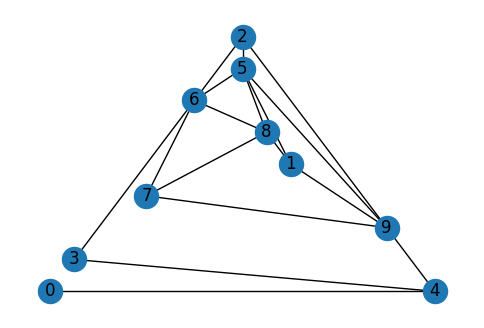

In [152]:
fig, ax = plt.subplots(1,1, figsize=(6,4))

nx.draw_planar(G, ax=ax, with_labels=True)

In [153]:
EIG = list(nx.eigenvector_centrality_numpy(G).values())

In [154]:
edgedict = G_to_dict(G)
H = xgi.Hypergraph(edgedict)
#xgi.draw(H, node_labels=True, font_color_nodes="blue")

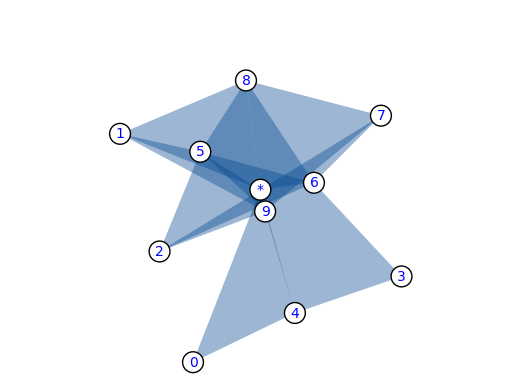

In [155]:
H3 = uniformize(H, m=3)
xgi.draw(H3, node_labels=True, font_color_nodes="blue")

In [156]:
HEC = xgi.HEC_centrality(H3)
HEC.pop('*')

0.15182650742768647

In [157]:
# Ordered list
HEC = list(OrderedDict(sorted(HEC.items())).values())

In [158]:
KT(EIG, HEC).statistic

0.9999999999999999

In [159]:
EIG /= np.sum(EIG)
EIG

array([0.01276302, 0.10825116, 0.11089929, 0.04859496, 0.0501237 ,
       0.15931821, 0.14072142, 0.10351585, 0.1303215 , 0.1354909 ])

In [160]:
HEC /= np.sum(HEC)
HEC

array([0.04905664, 0.1017677 , 0.10294663, 0.0768096 , 0.08413149,
       0.12680106, 0.12211853, 0.10110748, 0.11368132, 0.12157956])

In [161]:
cents = np.stack((EIG, HEC)).T

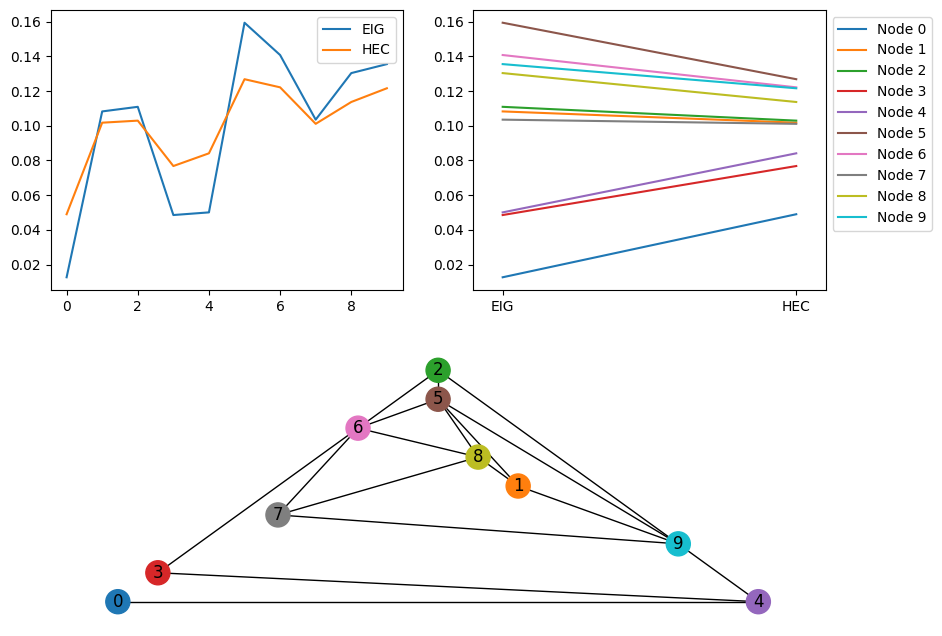

In [162]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# First figure

ax1.plot(EIG, label='EIG')
ax1.plot(HEC, label='HEC')
ax1.legend()

# Second figure

ax2.set_xlim(-0.1,1.1)
ax2.set_xticks([0,1], ['EIG', 'HEC'])

for i, row in enumerate(cents):
    ax2.plot(row, color=colors[i], label=f'Node {i}')

ax2.legend(bbox_to_anchor=(1,1))


# Graph:
ax3 = fig.add_subplot(212)
nx.draw_planar(G, ax=ax3, with_labels=True, node_color=colors[:len(sortEIG)])



## Scale-free

In [163]:
G = nx.complete_graph(5)

In [164]:
while not nx.is_planar(G) or not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p=2*np.log(n)/n)

In [165]:
EIG = list(nx.eigenvector_centrality_numpy(G).values())

In [166]:
edgedict = G_to_dict(G)
H = xgi.Hypergraph(edgedict)
#xgi.draw(H, with_labels=True)

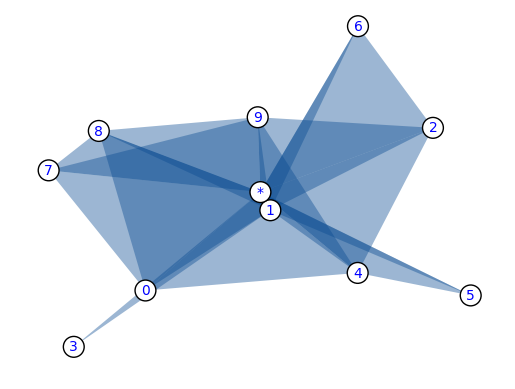

In [167]:
H3 = uniformize(H, m=3)
xgi.draw(H3, node_labels=True, font_color_nodes="blue")

In [168]:
HEC = xgi.HEC_centrality(H3)
HEC.pop('*')

0.15173551436094218

In [169]:
HEC = list(OrderedDict(sorted(HEC.items())).values())

In [170]:
KT(EIG, HEC).statistic

0.911111111111111

In [171]:
EIG /= np.sum(EIG)
EIG

array([0.10788936, 0.16806312, 0.10974205, 0.03744627, 0.13023268,
       0.06646351, 0.06189798, 0.07765043, 0.10827354, 0.13234107])

In [172]:
HEC /= np.sum(HEC)
HEC

array([0.10625807, 0.13861841, 0.10614116, 0.05879279, 0.11699439,
       0.07983713, 0.07812382, 0.09080732, 0.10636964, 0.11805726])

In [173]:
cents = np.stack((EIG, HEC)).T

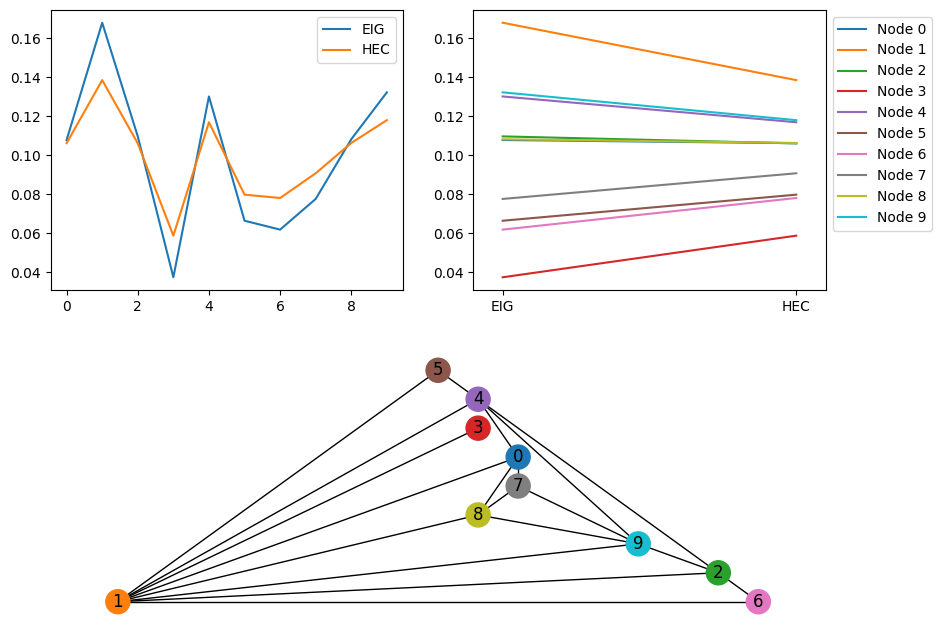

In [174]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# First figure

ax1.plot(EIG, label='EIG')
ax1.plot(HEC, label='HEC')
ax1.legend()

# Second figure

ax2.set_xlim(-0.1,1.1)
ax2.set_xticks([0,1], ['EIG', 'HEC'])

for i, row in enumerate(cents):
    ax2.plot(row, color=colors[i], label=f'Node {i}')

ax2.legend(bbox_to_anchor=(1,1))

# Graph:
ax3 = fig.add_subplot(212)
nx.draw_planar(G, ax=ax3, with_labels=True, node_color=colors[:len(sortEIG)])

